In [1]:
# import libraries
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearny
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset

In [2]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [3]:
# Random shuffling of data, select the first 200,000
data = data.sample(frac=1)
data = data[:20000]

# Data Visualization

In [4]:
print("Dataset shape:", data.shape)

Dataset shape: (20000, 6)


In [5]:
data.head(10)

,polarity,id,date,query,user,text
359143,0,2045615858,Fri Jun 05 10:59:16 PDT 2009,NO_QUERY,ChantalKrahn,Shin splints.. From ballet flats?? Ouch.. Who ...
310676,0,2001144373,Mon Jun 01 23:58:34 PDT 2009,NO_QUERY,amandaDIZON,@ amirrrrr i am too busy trying to teach mysel...
505007,0,2188283055,Mon Jun 15 21:37:03 PDT 2009,NO_QUERY,emzey94,"chilling at school, science is boring"
1295165,4,2003644025,Tue Jun 02 06:54:12 PDT 2009,NO_QUERY,kristenhul,@TaniaO I am wondering how your trip is going ...
1503444,4,2071969008,Sun Jun 07 20:10:56 PDT 2009,NO_QUERY,BarbieGirl689,@enfdancer but you loveeee me
1408058,4,2055634006,Sat Jun 06 09:40:31 PDT 2009,NO_QUERY,Alexx_Nightmare,"@vic_redpanda Sorry, I don't spend all my time..."
1344344,4,2039869246,Thu Jun 04 23:01:03 PDT 2009,NO_QUERY,Mundilia,What? Did tonight really happen? We'll see in ...
211099,0,1974404823,Sat May 30 13:04:12 PDT 2009,NO_QUERY,LSto09,I thought i saw juneyboomdata's backup dancer ...
566244,0,2206777178,Wed Jun 17 07:02:24 PDT 2009,NO_QUERY,dramaqueenx0x,I hate my 7.30AM class It's incredibly UNGODL...
1354245,4,2046981610,Fri Jun 05 12:58:43 PDT 2009,NO_QUERY,glamourmoms,@thecolinium Most def!! One of my very first ...


In [6]:
data['polarity'].unique()

array([0, 4])

In [7]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
359143,0,2045615858,Fri Jun 05 10:59:16 PDT 2009,NO_QUERY,ChantalKrahn,Shin splints.. From ballet flats?? Ouch.. Who ...
310676,0,2001144373,Mon Jun 01 23:58:34 PDT 2009,NO_QUERY,amandaDIZON,@ amirrrrr i am too busy trying to teach mysel...
505007,0,2188283055,Mon Jun 15 21:37:03 PDT 2009,NO_QUERY,emzey94,"chilling at school, science is boring"
1295165,1,2003644025,Tue Jun 02 06:54:12 PDT 2009,NO_QUERY,kristenhul,@TaniaO I am wondering how your trip is going ...
1503444,1,2071969008,Sun Jun 07 20:10:56 PDT 2009,NO_QUERY,BarbieGirl689,@enfdancer but you loveeee me


In [8]:
data.describe()

,polarity,id
count,20000.000000,2.000000e+04
mean,0.500300,2.002040e+09
std,0.500012,1.920561e+08
min,0.000000,1.467822e+09
25%,0.000000,1.957629e+09
50%,1.000000,2.002956e+09
75%,1.000000,2.178173e+09
max,1.000000,2.329166e+09


In [9]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         20000
No. of positve tagged sentences is:  10006
No. of negative tagged sentences is: 9994


In [10]:
# get a word count per of text
def word_count(words):
    return len(words.split())

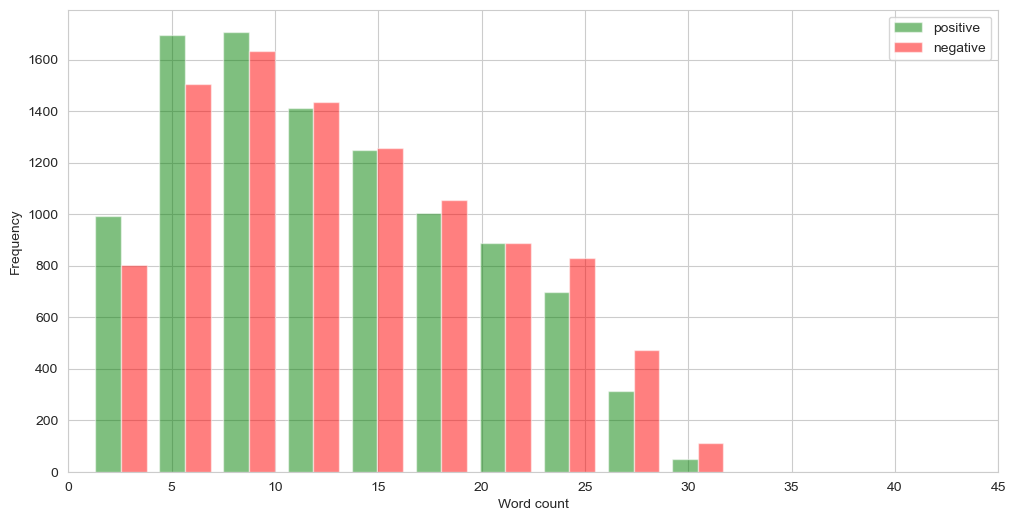

In [11]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [12]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 6401),
 ('and', 3657),
 ('you', 2890),
 ('for', 2758),
 ('have', 1788),
 ('that', 1659),
 ("i'm", 1622),
 ('but', 1559),
 ('just', 1557),
 ('with', 1353),
 ('was', 1286),
 ('not', 1255),
 ('this', 1114),
 ('get', 1002),
 ('good', 967),
 ('are', 958),
 ('like', 921),
 ('out', 894),
 ('all', 866),
 ('your', 795)]

<Axes: xlabel='polarity', ylabel='count'>

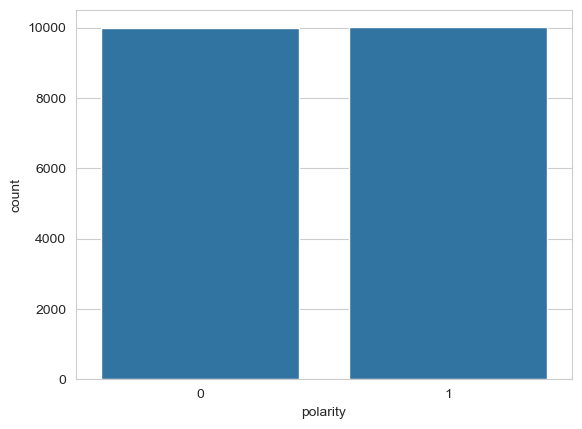

In [13]:
%matplotlib inline
sns.countplot(x=data['polarity'])

# Data Processing
## The Preprocessing steps taken are:
1. Lower Casing: Each text is converted to lowercase.
2. Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

3. Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

4. Removing Short Words: Words with length less than 2 are removed.
5. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
6. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [14]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [15]:
data.drop('id', axis=1, inplace=True)
data.head(10)

,polarity,text
359143,0,Shin splints.. From ballet flats?? Ouch.. Who ...
310676,0,@ amirrrrr i am too busy trying to teach mysel...
505007,0,"chilling at school, science is boring"
1295165,1,@TaniaO I am wondering how your trip is going ...
1503444,1,@enfdancer but you loveeee me
1408058,1,"@vic_redpanda Sorry, I don't spend all my time..."
1344344,1,What? Did tonight really happen? We'll see in ...
211099,0,I thought i saw juneyboomdata's backup dancer ...
566244,0,I hate my 7.30AM class It's incredibly UNGODL...
1354245,1,@thecolinium Most def!! One of my very first ...


In [16]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [17]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [18]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{"needn't", 'yours', 'too', 'if', "we've", 'just', 'as', 'couldn', 'be', 'hasn', 'being', 'such', 'have', 'during', 'again', "shan't", "isn't", 'very', 'when', 'my', 'his', "he'd", 'weren', "weren't", 'now', "i'm", "hadn't", 'i', 'himself', 'this', 'who', 'before', 'it', 'yourself', "they've", 'why', 'not', 'ours', 'won', "you'll", 'into', 'because', 'other', 'will', 'o', 'shouldn', "won't", 'that', 'below', 'needn', 'them', 'both', 'with', 'on', "should've", 'once', 'to', 'been', "they'd", 'than', 'didn', "that'll", 'its', 'y', 'so', 'by', 'am', 'are', 'which', "we'll", 're', 'each', "she'd", 'few', "haven't", 'any', 'itself', "you'd", 'for', "they'll", 'theirs', 'between', 'll', 'here', 'their', 'but', "don't", 'ain', 'ma', 'ourselves', 'all', 'down', 'what', 'wouldn', 'out', 'from', "wouldn't", "i'd", 'own', 'of', "it'll", 'hers', "she'll", 'while', 'an', 'against', 'some', "mustn't", 'themselves', 'aren', 'in', 'our', 'm', "you've", "mightn't", "doesn't", 've', "aren't", 't', 'up',

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    #final_tokens = [w for w in tokens if w not in stopword]
    final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    negation_words = {"not", "no", "never", "n't"}
    prev_neg = False

    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        #finalwords.append(word)
        if word in negation_words:
          prev_neg = True
        elif prev_neg:
          finalwords.append("not_" + word)
          prev_neg = False
        else:
          finalwords.append(word)
    return ' '.join(finalwords)

In [21]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [22]:
data.head(10)

,polarity,text,processed_tweets
359143,0,Shin splints.. From ballet flats?? Ouch.. Who ...,shin splint from ballet flat ouch who knew
310676,0,@ amirrrrr i am too busy trying to teach mysel...,amirrrrr am too busy trying to teach myself ab...
505007,0,"chilling at school, science is boring",chilling at school science is boring
1295165,1,@TaniaO I am wondering how your trip is going ...,am wondering how your trip is going missy hope...
1503444,1,@enfdancer but you loveeee me,but you loveeee me
1408058,1,"@vic_redpanda Sorry, I don't spend all my time...",sorry dont spend all my time searching for bac...
1344344,1,What? Did tonight really happen? We'll see in ...,what did tonight really happen well see in the...
211099,0,I thought i saw juneyboomdata's backup dancer ...,thought saw juneyboomdatas backup dancer come ...
566244,0,I hate my 7.30AM class It's incredibly UNGODL...,hate my 730am class it incredibly ungodly to h...
1354245,1,@thecolinium Most def!! One of my very first ...,most def one of my very first word wa yzermanb...


# RNN - LSTM

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re
import keras
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint


## Hyperparameters

In [24]:
num_epochs = 10
results = {}
params_history = {}
# Define the maximum length of each sequence (number of words per tweet)
max_len = 200

# hidden layer
hidden_layers_list = [1, 2, 3, 4]
hidden_units_list = [4, 8, 16, 32]

# LSTM layer
LSTM_units = 32


# Embedding layer
# Define the 5000 most common words
max_words = 5000
embedding_dim = 64

## Converting text data into sequences

In [25]:
# Initialize the tokenizer, keeping only the top 'max_words' most frequent words
tokenizer = Tokenizer(num_words=max_words)
# Fit the tokenizer on the processed tweets to build the word index
tokenizer.fit_on_texts(data.processed_tweets)
# Convert each tweet (text) into a sequence of integer indices based on the word index
sequences = tokenizer.texts_to_sequences(data.processed_tweets)

# Pad or truncate all sequences to the same length ('max_len')
# - If a sequence is shorter than 'max_len', it will be padded with zeros at the beginning.
# - If a sequence is longer than 'max_len', it will be truncated from the beginning.
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  817  159  723]
 [   0    0    0 ...   53 2996  112]
 [   0    0    0 ... 1420    7  500]
 ...
 [   0    0    0 ... 1391 1581   41]
 [   0    0    0 ...    1  894    1]
 [   0    0    0 ...   90   27   46]]


## Split Traning and Test data

In [26]:
train_data, test_data, train_label, test_label = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)
print(np.unique(train_label))
print(np.unique(test_label))

[0 1]
[0 1]


## Creating and Traning LSTM Model

In [27]:
def create_lstm_model(hidden_layers, hidden_units):
    model = Sequential()
    model.add(layers.Embedding(max_words, embedding_dim))
    model.add(layers.LSTM(LSTM_units, dropout=0.5))
    for _ in range(hidden_layers):
        model.add(layers.Dense(hidden_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [28]:
models = {}
for hidden_layers in hidden_layers_list:
    for hidden_units in hidden_units_list:
        print(f"Training model with {hidden_layers} hidden layers and {hidden_units} hidden units per layer...")

        model = create_lstm_model(hidden_layers, hidden_units)

        history = model.fit(
            train_data, train_label,
            epochs=num_epochs,
            validation_data=(test_data, test_label),
            verbose=2
        )

        results[(hidden_layers, hidden_units)] = {
            'train_acc': history.history['accuracy'][-1],
            'test_acc': history.history['val_accuracy'][-1]
        }

        params_history[(hidden_layers, hidden_units)] = model.count_params()
        models[(hidden_layers, hidden_units)] = model

Training model with 1 hidden layers and 4 hidden units per layer...
Epoch 1/10
500/500 - 20s - 40ms/step - accuracy: 0.6649 - loss: 0.6114 - val_accuracy: 0.7575 - val_loss: 0.5045
Epoch 2/10
500/500 - 18s - 35ms/step - accuracy: 0.7896 - loss: 0.4615 - val_accuracy: 0.7690 - val_loss: 0.4885
Epoch 3/10
500/500 - 18s - 35ms/step - accuracy: 0.8199 - loss: 0.4096 - val_accuracy: 0.7648 - val_loss: 0.5060
Epoch 4/10
500/500 - 18s - 35ms/step - accuracy: 0.8379 - loss: 0.3759 - val_accuracy: 0.7623 - val_loss: 0.5127
Epoch 5/10
500/500 - 18s - 35ms/step - accuracy: 0.8520 - loss: 0.3476 - val_accuracy: 0.7573 - val_loss: 0.5488
Epoch 6/10
500/500 - 18s - 35ms/step - accuracy: 0.8587 - loss: 0.3274 - val_accuracy: 0.7517 - val_loss: 0.5693
Epoch 7/10
500/500 - 18s - 35ms/step - accuracy: 0.8754 - loss: 0.2999 - val_accuracy: 0.7513 - val_loss: 0.5977
Epoch 8/10
500/500 - 17s - 35ms/step - accuracy: 0.8824 - loss: 0.2797 - val_accuracy: 0.7508 - val_loss: 0.6203
Epoch 9/10
500/500 - 18s - 3

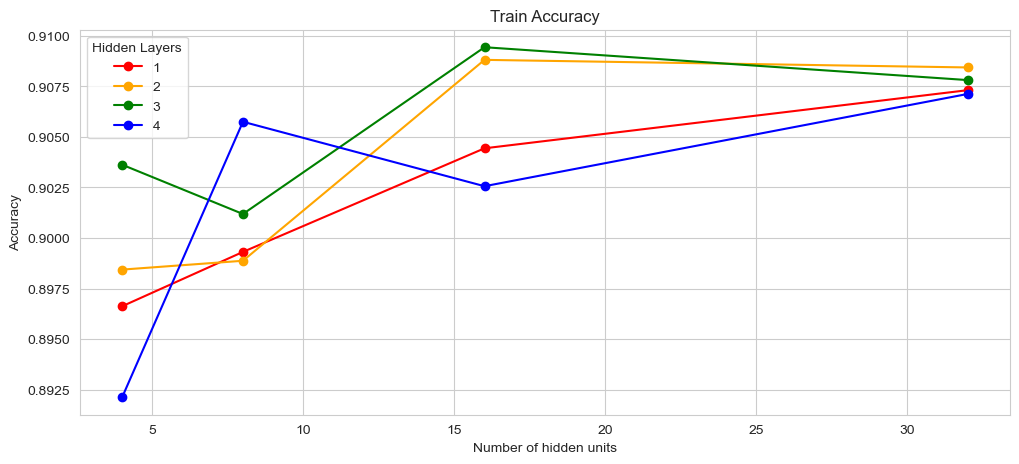

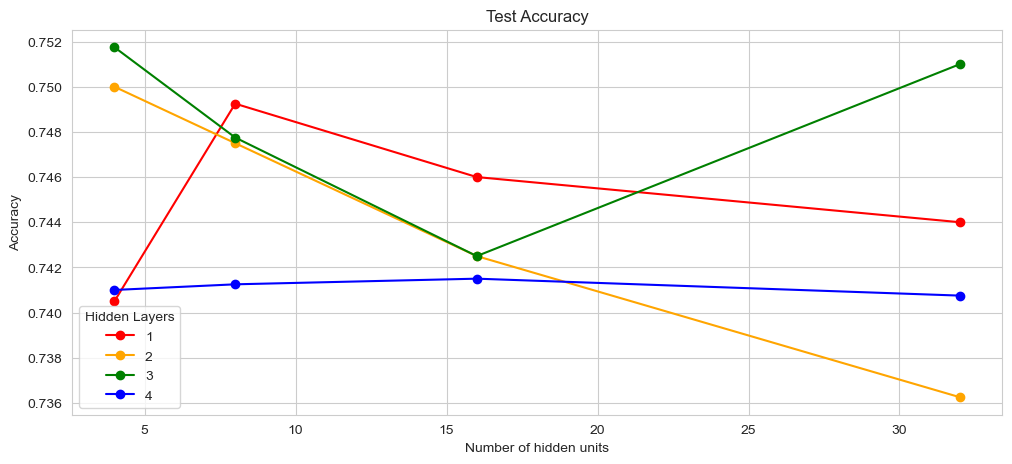

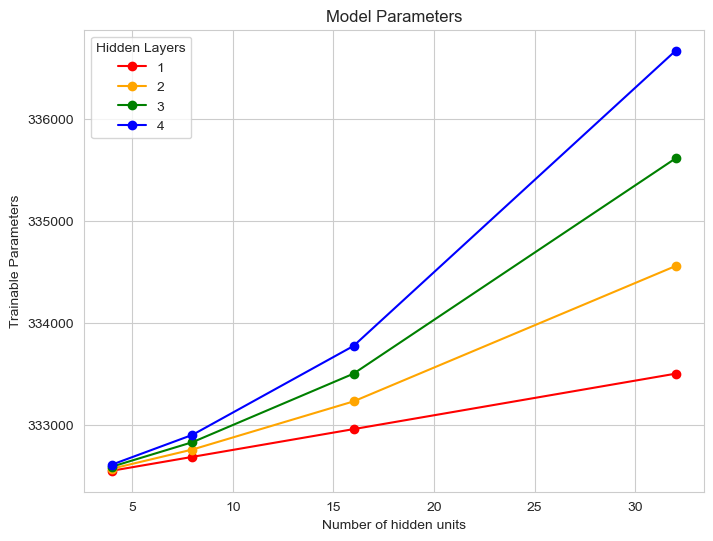

In [33]:
colors = ['red', 'orange', 'green', 'blue']

plt.figure(figsize=(12, 5))
# --- 训练精度折线图 ---
for i, hl in enumerate(hidden_layers_list):
    train_acc = [results[(hl, hu)]['train_acc'] for hu in hidden_units_list]
    plt.plot(hidden_units_list, train_acc, marker='o', linestyle='-', color=colors[i], label=f"{hl}")
plt.xlabel("Number of hidden units")
plt.ylabel("Accuracy")
plt.title("Train Accuracy")
plt.legend(title="Hidden Layers")
plt.show()

# --- 测试精度折线图 ---
plt.figure(figsize=(12, 5))
for i, hl in enumerate(hidden_layers_list):
    test_acc = [results[(hl, hu)]['test_acc'] for hu in hidden_units_list]
    plt.plot(hidden_units_list, test_acc, marker='o', linestyle='-', color=colors[i], label=f"{hl}")
plt.xlabel("Number of hidden units")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend(title="Hidden Layers")
plt.show()

# --- 参数量变化折线图 ---
plt.figure(figsize=(8, 6))
for i, hl in enumerate(hidden_layers_list):
    params = [params_history[(hl, hu)] for hu in hidden_units_list]
    plt.plot(hidden_units_list, params, marker='o', linestyle='-', color=colors[i], label=f"{hl}")
plt.xlabel("Number of hidden units")
plt.ylabel("Trainable Parameters")
plt.title("Model Parameters")
plt.legend(title="Hidden Layers")
plt.show()
